In [25]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn

data_path = './../../data/processed/'

import json
vardict = json.load(open("variables.json"))
def add_entry(vardict, name, element):
    vardict[name]= element
    return vardict

# vardict = dict() dont run!, only if we need to clean the variables from scratch
# args = ['variable2', x.format()]
# res = add_entry(vardict, *args)

In [2]:
df = pd.read_csv('./../../data/processed/ID_Y.csv')


In [3]:
ID_Y = df.groupby(['ID', 'YEAR'])[['VART']].sum()
ID_Y = ID_Y.loc[ID_Y.VART > 0]

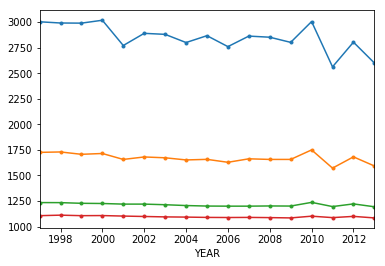

In [4]:
for q in [.1, .05, .02, .01]:
    ID_Y.reset_index().groupby('YEAR')['VART'].quantile(q).plot(marker = '.')

## Variables describing the total

In [26]:
df = pd.read_csv(data_path + '_FBCP.csv',
                usecols = ['ID', 'IMPORT', 'CN ID 8', 'CPA6', 'CN ID 4','PYOD', 'VAT', 'VART'])

# Ha cambiado, etsa en 3 periodos porque 

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
varnames_list = []

In [28]:
varnames_list += [['nuniqueDemoStartYr', '1997']]
varnames_list += [['nuniqueDemoEndYr', '2013']]

In [31]:
dfX = df.loc[df.IMPORT == 0]

nunq = dfX.nunique()
varnames_list += [['nuniqueDemoNfirmsX', str(nunq['ID'].round(-3))]]
varnames_list += [['nuniqueDemoNCN8X', str(nunq['CN ID 8'].round(-1))]]
varnames_list += [['nuniqueDemoNpyodX', str(nunq['PYOD'])]]
varnames_list += [['nuniqueDemoNbuyersX', str(nunq['VAT'].round(-3))]]

sorted_vals = dfX.groupby('ID')['VART'].sum().sort_values(ascending = False)
varnames_list += [['nuniqueDemoN90firmsX', str(sum((sorted_vals.cumsum()/sorted_vals.sum())<.9))]]

sorted_vals = dfX.groupby('CN ID 8')['VART'].sum().sort_values(ascending = False)
varnames_list += [['nuniqueDemoN90CN8X', str(sum((sorted_vals.cumsum()/sorted_vals.sum())<.9))]]

sorted_vals = dfX.groupby('CN ID 4')['VART'].sum().sort_values(ascending = False)
varnames_list += [['nuniqueDemoN90CN4X', str(sum((sorted_vals.cumsum()/sorted_vals.sum())<.9))]]

sorted_vals = dfX.groupby('PYOD')['VART'].sum().sort_values(ascending = False)
varnames_list += [['nuniqueDemoN90pyodX', str(sum((sorted_vals.cumsum()/sorted_vals.sum())<.9))]]

sorted_vals = dfX.groupby('VAT')['VART'].sum().sort_values(ascending = False)
varnames_list += [['nuniqueDemoN90buyersX', str(sum((sorted_vals.cumsum()/sorted_vals.sum())<.9))]]


dfM = df.loc[df.IMPORT == 1]

sorted_vals = dfM.groupby('ID')['VART'].sum().sort_values(ascending = False)
varnames_list += [['nuniqueDemoN90firmsM', str(sum((sorted_vals.cumsum()/sorted_vals.sum())<.9))]]

sorted_vals = dfM.groupby('CN ID 8')['VART'].sum().sort_values(ascending = False)
varnames_list += [['nuniqueDemoN90CN8M', str(sum((sorted_vals.cumsum()/sorted_vals.sum())<.9))]]

sorted_vals = dfM.groupby('CN ID 4')['VART'].sum().sort_values(ascending = False)
varnames_list += [['nuniqueDemoN90CN4M', str(sum((sorted_vals.cumsum()/sorted_vals.sum())<.9))]]

sorted_vals = dfM.groupby('PYOD')['VART'].sum().sort_values(ascending = False)
varnames_list += [['nuniqueDemoN90pyodM', str(sum((sorted_vals.cumsum()/sorted_vals.sum())<.9))]]

In [33]:
varnames_list

[['nuniqueDemoStartYr', '1997'],
 ['nuniqueDemoEndYr', '2013'],
 ['nuniqueDemoNfirmsX', '114000'],
 ['nuniqueDemoNCN8X', '8970'],
 ['nuniqueDemoNpyodX', '234'],
 ['nuniqueDemoNbuyersX', '442000'],
 ['nuniqueDemoN90firmsX', '5233'],
 ['nuniqueDemoN90CN8X', '1845'],
 ['nuniqueDemoN90CN4X', '333'],
 ['nuniqueDemoN90pyodX', '42'],
 ['nuniqueDemoN90buyersX', '11869'],
 ['nuniqueDemoN90firmsM', '9159'],
 ['nuniqueDemoN90CN8M', '2107'],
 ['nuniqueDemoN90CN4M', '334'],
 ['nuniqueDemoN90pyodM', '36']]

In [34]:
for var in varnames_list:
    res = add_entry(vardict, *var)
    
f = open("variables.json","w")
f.write(json.dumps(res))
f.close()

In [ ]:
# json.load(open("variables.json"))

# Size distribution plots

In [11]:
col = 'ID'
df = pd.read_csv(data_path + col.replace(' ', '_')+'_Y.csv')
# df['date'] = pd.DatetimeIndex(pd.to_datetime(12*(df.YEAR - 1997) + df.MONTH, unit='M', origin=pd.Timestamp('1996-12-15'))).round('D')
    

In [12]:
fs_df = df.groupby(['ID','IMPORT','YEAR'])['VART'].sum().reset_index()

In [13]:
# If we need to print the color strings..

from pylab import *

cmap = cm.get_cmap('tab10', 10)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


In [14]:
from numpy import log10, inf, nan
fs_df['log_VART'] = log10(fs_df['VART'])


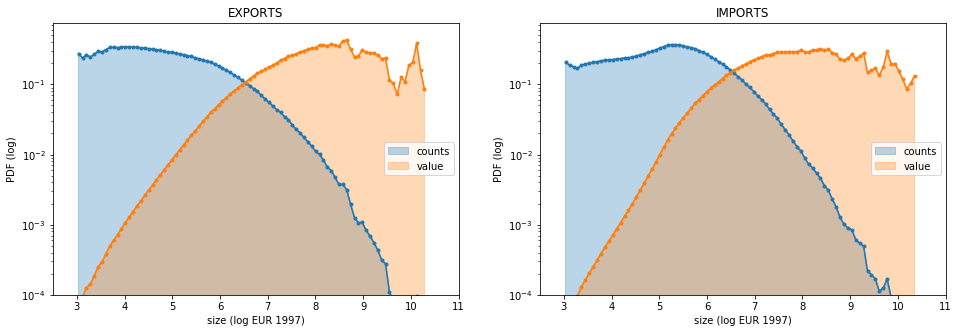

In [22]:

fig, axs = plt.subplots(1, 2, figsize = (16, 5))
for i in [0, 1]:
#         fs_df_slice = fs_df.loc[(fs_df.YEAR >= y) & (fs_df.IMPORT == i)].replace(-inf, nan).dropna()
    fs_df_slice = fs_df.loc[fs_df.IMPORT == i].replace(-inf, nan).dropna()
    fs_df_slice['bin'], bins_x = pd.cut(fs_df_slice['log_VART'], 90, retbins=True)
    bin_width = pd.Series(bins_x).diff().median()

    fs_ct_val = fs_df_slice.groupby('bin').agg({'ID': 'count', 'VART': sum}).rename(columns = {'ID': 'counts', 'VART': 'value'})

    fs_ct_val/=fs_ct_val.sum()
    fs_ct_PDF = fs_ct_val/bin_width
    ax = axs[i]
    fs_ct_PDF['log_VART'] = (bins_x[:-1] + bins_x[1:])/2.
    fs_ct_PDF.plot(x = 'log_VART', y = 'counts', marker = '.', ax = ax, c = '#1f77b4', legend = False)
    fs_ct_PDF.iloc[0:].plot.area(x = 'log_VART', y = 'counts', ax = ax, alpha = .3, color = '#1f77b4')
    fs_ct_PDF.plot(x = 'log_VART', y = 'value', marker = '.', ax = ax, c= '#ff7f0e', legend = False)
    fs_ct_PDF.iloc[0:].plot.area(x = 'log_VART', y = 'value', ax = ax, alpha = .3, color = '#ff7f0e')
#     ax.set_title('IMPORTS, '+str(y)) if i == 1 else ax.set_title('EXPORTS, '+str(y))
    ax.set_title(['EXPORTS', 'IMPORTS'][i])
    ax.set_yscale('log')
    ax.set_xlabel('size (log EUR 1997)')
    ax.set_ylabel('PDF (log)')
    ax.set_ylim(0.0001, 0.75)
    ax.set_xlim(2.5, 11)
plt.savefig('./../../../thesis_writing/figures/size_dist_log.png')

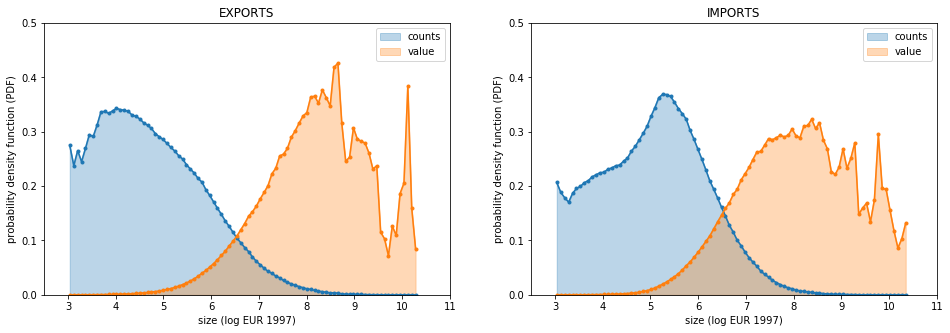

In [23]:

fig, axs = plt.subplots(1, 2, figsize = (16, 5))
for i in [0, 1]:
#         fs_df_slice = fs_df.loc[(fs_df.YEAR >= y) & (fs_df.IMPORT == i)].replace(-inf, nan).dropna()
    fs_df_slice = fs_df.loc[fs_df.IMPORT == i].replace(-inf, nan).dropna()
    fs_df_slice['bin'], bins_x = pd.cut(fs_df_slice['log_VART'], 90, retbins=True)
    bin_width = pd.Series(bins_x).diff().median()

    fs_ct_val = fs_df_slice.groupby('bin').agg({'ID': 'count', 'VART': sum}).rename(columns = {'ID': 'counts', 'VART': 'value'})

    fs_ct_val/=fs_ct_val.sum()
    fs_ct_PDF = fs_ct_val/bin_width
    ax = axs[i]
    fs_ct_PDF['log_VART'] = (bins_x[:-1] + bins_x[1:])/2.
    fs_ct_PDF.plot(x = 'log_VART', y = 'counts', marker = '.', ax = ax, c = '#1f77b4', legend = False)
    fs_ct_PDF.iloc[0:].plot.area(x = 'log_VART', y = 'counts', ax = ax, alpha = .3, color = '#1f77b4')
    fs_ct_PDF.plot(x = 'log_VART', y = 'value', marker = '.', ax = ax, c= '#ff7f0e', legend = False)
    fs_ct_PDF.iloc[0:].plot.area(x = 'log_VART', y = 'value', ax = ax, alpha = .3, color = '#ff7f0e')
    ax.set_title(['EXPORTS', 'IMPORTS'][i])
#     ax.set_yscale('log')
    ax.set_xlabel('size (log EUR 1997)')
    ax.set_ylabel('probability density function (PDF)')
    ax.set_ylim(0.0001, 0.5)
    ax.set_xlim(2.5, 11)
plt.savefig('./../../../thesis_writing/figures/size_dist.png')

In [21]:
# OK, we got the synthetic dist of exponents
# n = int(1e5)
# exps = np.random.normal(mu, sigma, n)

### Gabaix

In [ ]:
import numpy as np

# df_ = df.sample(frac = .01)
df_ = df.head(100000)

In [ ]:
plt.hist(np.log10(df_['VART']).replace(-inf, nan).dropna(), 100)
plt.show()

In [ ]:
df_['shares'] = df_['VART']/df_['VART'].sum()


In [ ]:
plt.hist(np.log10(df_['shares']).replace(-inf, nan).dropna(), 100)
plt.hist(np.log10(df_['shares']**2).replace(-inf, nan).dropna(), 100)
plt.show()

In [ ]:
np.sqrt(sum(df_['shares']**2))

In [ ]:
import warnings
warnings.filterwarnings('ignore')